In [1]:
!nvidia-smi

Thu Jul  6 10:26:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck' ]
NUM_CLASSES = 10


if y_test.shape[1] == 1:
  x_train = x_train/255.
  x_test = x_test/255.
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 24s 7ms/step - loss: 1.4688 - accuracy: 0.4647 - val_loss: 1.1273 - val_accuracy: 0.5975
Epoch 2/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9753 - accuracy: 0.6560 - val_loss: 0.8694 - val_accuracy: 0.6987
Epoch 3/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7770 - accuracy: 0.7273 - val_loss: 0.8145 - val_accuracy: 0.7170
Epoch 4/30
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6572 - accuracy: 0.7702 - val_loss: 0.8350 - val_accuracy: 0.7118
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5564 - accuracy: 0.8028 - val_loss: 0.7637 - val_accuracy: 0.7420
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4847 - accuracy: 0.8329 - val_loss: 0.8340 - val_accuracy: 0.7266
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4125 - accuracy: 0.8548 - val_loss: 0.8511 - val_ac

KeyboardInterrupt: ignored

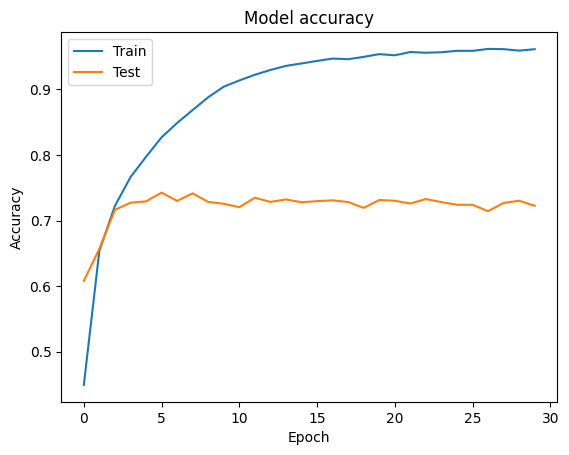

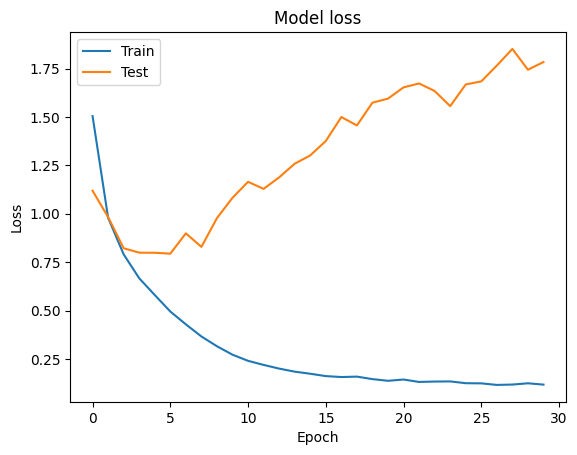

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 15s 7ms/step - loss: 1.7314 - accuracy: 0.3574 - val_loss: 1.2931 - val_accuracy: 0.5379
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2888 - accuracy: 0.5418 - val_loss: 1.0629 - val_accuracy: 0.6204
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1049 - accuracy: 0.6143 - val_loss: 0.9593 - val_accuracy: 0.6688
Epoch 4/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9951 - accuracy: 0.6525 - val_loss: 0.9439 - val_accuracy: 0.6686
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9226 - accuracy: 0.6796 - val_loss: 0.8557 - val_accuracy: 0.7026
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8669 - accuracy: 0.7012 - val_loss: 0.8382 - val_accuracy: 0.7173
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8151 - accuracy: 0.7214 - val_loss: 0.8066 - val_ac

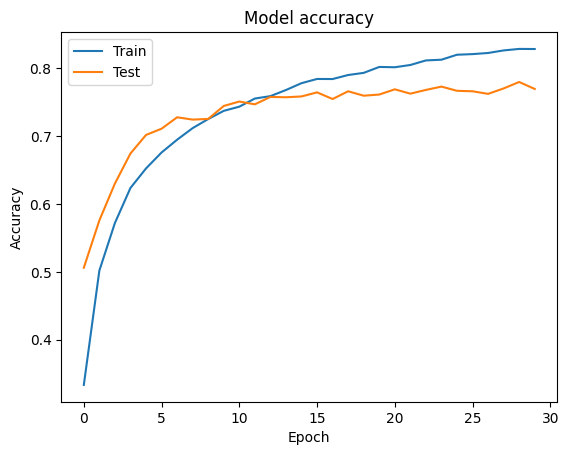

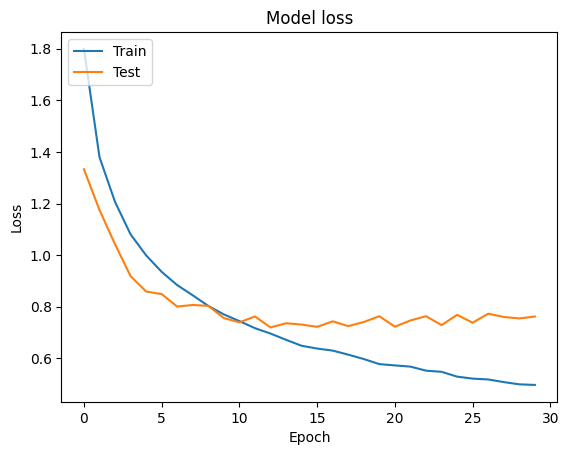

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()